In [ ]:
import torch
from torch import nn
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as spio
from sklearn.decomposition import PCA

from modules import optimize_ML

### Load data

In [ ]:
# load sample trajectory
sim_idx = 0 # which out of the 100 trajectories to use
data_path = Path('data')
f_name = 'sim_0134.mat'
S = spio.loadmat(Path(data_path) / f_name)['S']
S_list = [S[0, i] for i in range(S.shape[1])]  # convert to list of structs

# unpack data
n_corr_obs = S_list[sim_idx]['Pc_reshaped'][0, 0] * S_list[sim_idx]['num_trials_mat'][0, 0]
n_total_obs = S_list[sim_idx]['num_trials_mat'][0, 0]
n_frames = S_list[sim_idx]['Pc_reshaped'][0, 0].shape[0]
n_dim = S_list[sim_idx]['x'][0, 0].shape[0]

### Run optimization

In [ ]:
# loss, x, c, p = run_MLEfit(n_dim, n_corr_obs, n_total_obs)
x, c, p, _, _, _ = optimize_ML(n_dim, n_corr_obs, n_total_obs, verbose=True, n_starts=10)

Current loss: 293.40608448162675
Loss updated
Iteration 1 | Loss: 293.40608448162675
Current loss: 319.6707886606455
Iteration 2 | Loss: 319.6707886606455
Current loss: 327.9890157543123
Iteration 3 | Loss: 327.9890157543123
Current loss: 297.87249718233943
Iteration 4 | Loss: 297.87249718233943
Current loss: 321.15394250303507
Iteration 5 | Loss: 321.15394250303507
Current loss: 306.8029734045267
Iteration 6 | Loss: 306.8029734045267
Current loss: 281.0360752120614
Loss updated
Iteration 7 | Loss: 281.0360752120614
Current loss: 292.70861543715
Iteration 8 | Loss: 292.70861543715
Current loss: 303.9543298408389
Iteration 9 | Loss: 303.9543298408389
Iteration 10 | Loss: 323.72021798044443


In [8]:
# plt.plot(loss)
# plt.title('Loss over iterations')
# plt.show()

In [12]:
# compute PC-reduced perceptual locations
pca_true = PCA(n_components=2)
pca_fit = PCA(n_components=2)

# ground truth perceptual locations
pca_true.fit(S_list[sim_idx]['x'][0, 0])
pc_true = pca_true.components_

pca_fit.fit(x.squeeze().detach())
pc_fit = pca_fit.components_

In [6]:
# fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# axs[0, 0].plot(pc_true[0, :], pc_true[1, :], '-ko', markersize=10, markerfacecolor='r', linewidth=1)
# axs[0, 0].set_title('Ground truth trajectory')
# axs[0, 0].set_xlabel('PC 1')
# axs[0, 0].set_ylabel('PC 2')
# axs[0, 0].set_box_aspect(1)  
# axs[0, 0].set_aspect('equal') 
# axs[0, 0].spines['top'].set_visible(False)  
# axs[0, 0].spines['right'].set_visible(False)

# sns.heatmap(S_list[sim_idx]['Pc_reshaped'][0, 0], ax=axs[0, 1], cmap='gray')
# axs[0, 1].invert_yaxis()
# axs[0, 1].set_title('Simulated discriminability')

# axs[0, 2].plot(torch.flatten(torch.rad2deg(c)).detach(), np.rad2deg(S_list[sim_idx]['c'][0, 0]).flatten(), 'go')
# axs[0, 2].plot([0, 180], [0, 180], 'k--')
# axs[0, 2].set_xlabel('Estimated curvature')
# axs[0, 2].set_ylabel('Ground truth curvature')

# axs[1, 0].plot(pc_fit[0, :], pc_fit[1, :], '-ko', markersize=10, markerfacecolor='g', linewidth=1)
# axs[1, 0].set_title('Estimated trajectory')
# axs[1, 0].set_xlabel('PC 1')
# axs[1, 0].set_ylabel('PC 2')
# axs[1, 0].set_box_aspect(1)  
# axs[1, 0].set_aspect('equal') 
# axs[1, 0].spines['top'].set_visible(False)  
# axs[1, 0].spines['right'].set_visible(False)

# sns.heatmap(p.detach(), ax=axs[1, 1], cmap='gray')
# axs[1, 1].invert_yaxis()
# axs[1, 1].set_title('Estimated proportion correct')

# axs[1, 2].plot(torch.flatten(p).detach(), S_list[sim_idx]['Pc_reshaped'][0, 0].flatten(), 'ro')
# axs[1, 2].plot([0.5, 1], [0.5, 1], 'k--')
# axs[1, 2].set_xlabel('Estimated performance')
# axs[1, 2].set_ylabel('Observed performance')

# plt.show()

/opt/anaconda3/envs/vision/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


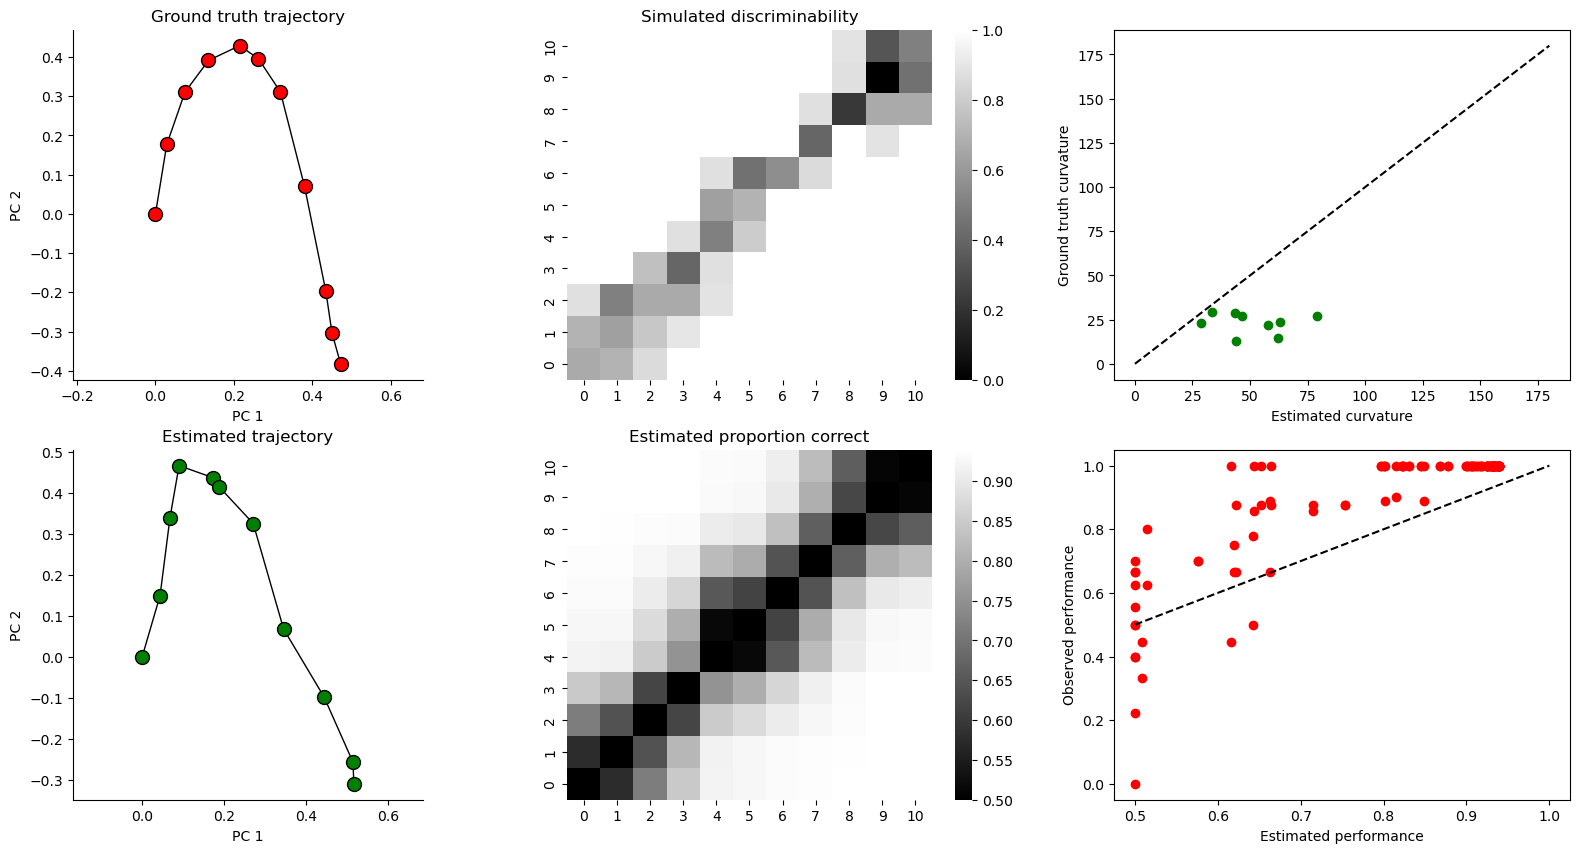

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0, 0].plot(pc_true[0, :], pc_true[1, :], '-ko', markersize=10, markerfacecolor='r', linewidth=1)
axs[0, 0].set_title('Ground truth trajectory')
axs[0, 0].set_xlabel('PC 1')
axs[0, 0].set_ylabel('PC 2')
axs[0, 0].set_box_aspect(1)  
axs[0, 0].set_aspect('equal') 
axs[0, 0].spines['top'].set_visible(False)  
axs[0, 0].spines['right'].set_visible(False)

sns.heatmap(S_list[sim_idx]['Pc_reshaped'][0, 0], ax=axs[0, 1], cmap='gray')
axs[0, 1].invert_yaxis()
axs[0, 1].set_title('Simulated discriminability')

axs[0, 2].plot(torch.flatten(torch.rad2deg(c)).detach(), np.rad2deg(S_list[sim_idx]['c'][0, 0]).flatten(), 'go')
axs[0, 2].plot([0, 180], [0, 180], 'k--')
axs[0, 2].set_xlabel('Estimated curvature')
axs[0, 2].set_ylabel('Ground truth curvature')

axs[1, 0].plot(pc_fit[0, :], pc_fit[1, :], '-ko', markersize=10, markerfacecolor='g', linewidth=1)
axs[1, 0].set_title('Estimated trajectory')
axs[1, 0].set_xlabel('PC 1')
axs[1, 0].set_ylabel('PC 2')
axs[1, 0].set_box_aspect(1)  
axs[1, 0].set_aspect('equal') 
axs[1, 0].spines['top'].set_visible(False)  
axs[1, 0].spines['right'].set_visible(False)

sns.heatmap(p.squeeze(), ax=axs[1, 1], cmap='gray')
axs[1, 1].invert_yaxis()
axs[1, 1].set_title('Estimated proportion correct')

axs[1, 2].plot(p.flatten(), S_list[sim_idx]['Pc_reshaped'][0, 0].flatten(), 'ro')
axs[1, 2].plot([0.5, 1], [0.5, 1], 'k--')
axs[1, 2].set_xlabel('Estimated performance')
axs[1, 2].set_ylabel('Observed performance')

plt.show()